**Se crea la conexion con el Drive para optener la base de datos**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import shutil
import os

In [38]:
%%bash
rm -rf dataset
mkdir -p dataset/train/normal
mkdir -p dataset/train/covid
mkdir -p dataset/validate/normal
mkdir -p dataset/validate/covid

In [39]:
import os
train_dir = os.path.join('./dataset/train')#os.path.join('COVID-19_Dataset/Train_C_RX')
validation_dir = os.path.join('./dataset/validate')#os.path.join('COVID-19_Dataset/val_CRX')

In [76]:
dataset_path = './dataset'
dataset_path_drive = 'drive/MyDrive/dataset_2/' 
covid_dataset_path = dataset_path_drive
csvPath = os.path.sep.join([covid_dataset_path, "COVID.metadata.csv"])
df = pd.read_csv(csvPath, usecols=["NAME","FORMAT"], delimiter=';')
print(df)

# train/covid
for (i, row) in df.iloc[:600].iterrows():

  imagePath = os.path.sep.join([covid_dataset_path, "covid", '{}.{}'.format(row["NAME"], str(row["FORMAT"]).lower())])
  if not os.path.exists(imagePath):
    continue
  filename = '{}.{}'.format(row["NAME"], str(row["FORMAT"]).lower())
  outputPath = os.path.sep.join([f"{dataset_path}/train/covid"])

  # copy the image
  shutil.copy2(imagePath, outputPath) 

# validate/covid
for (i, row) in df.iloc[600:630].iterrows():

  imagePath = os.path.sep.join([covid_dataset_path, "covid", '{}.{}'.format(row["NAME"], str(row["FORMAT"]).lower())])
  if not os.path.exists(imagePath):
    continue
  filename = '{}.{}'.format(row["NAME"], str(row["FORMAT"]).lower())
  outputPath = os.path.sep.join([f"{dataset_path}/validate/covid"])

  # copy the image
  shutil.copy2(imagePath, outputPath) 

            NAME FORMAT
0        COVID-1    PNG
1        COVID-2    PNG
2        COVID-3    PNG
3        COVID-4    PNG
4        COVID-5    PNG
...          ...    ...
3611  COVID-3612    PNG
3612  COVID-3613    PNG
3613  COVID-3614    PNG
3614  COVID-3615    PNG
3615  COVID-3616    PNG

[3616 rows x 2 columns]


In [77]:
normal_dataset_path = dataset_path_drive
csvPath = os.path.sep.join([normal_dataset_path, "Normal.metadata.csv"])
df = pd.read_csv(csvPath, usecols=["FILE_NAME","FORMAT"], delimiter=';')
print(df)

# train/normal
for (i, row) in df.iloc[:600].iterrows():

  imagePath = os.path.sep.join([normal_dataset_path, "normal", '{}.{}'.format(row["FILE_NAME"], str(row["FORMAT"]).lower()).capitalize()])
  if not os.path.exists(imagePath):
    continue
  filename = '{}.{}'.format(row["FILE_NAME"], str(row["FORMAT"]).lower()).capitalize()
  outputPath = os.path.sep.join([f"{dataset_path}/train/normal"])

  # copy the image
  shutil.copy2(imagePath, outputPath) 

# validate/normal
for (i, row) in df.iloc[600:640].iterrows():

  imagePath = os.path.sep.join([normal_dataset_path, "normal", '{}.{}'.format(row["FILE_NAME"], str(row["FORMAT"]).lower()).capitalize()])
  if not os.path.exists(imagePath):
    continue
  filename = '{}.{}'.format(row["FILE_NAME"], str(row["FORMAT"]).lower()).capitalize()
  outputPath = os.path.sep.join([f"{dataset_path}/validate/normal"])

  # copy the image
  shutil.copy2(imagePath, outputPath) 

          FILE_NAME FORMAT
0          NORMAL-1    PNG
1          NORMAL-2    PNG
2          NORMAL-3    PNG
3          NORMAL-4    PNG
4          NORMAL-5    PNG
...             ...    ...
10187  NORMAL-10188    PNG
10188  NORMAL-10189    PNG
10189  NORMAL-10190    PNG
10190  NORMAL-10191    PNG
10191  NORMAL-10192    PNG

[10192 rows x 2 columns]


In [78]:
#Ruta de alguna imagen que pertenezca al conjunto de entrenamiento
p='./dataset/train/covid/COVID-12.png'
p

'./dataset/train/covid/COVID-12.png'

In [79]:
#Ruta de alguna imagen que pertenezca al conjunto de entrenamiento
img_path = p

# Preprocesamos la imagen en un tensor 4D
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Recordatorio el modelo sera entrenado con imágenes
#de entrada que se preprocesaron de la siguiente manera:
img_tensor /= 255.

# Su dimensión es de (1, 224, 224, 3)
print(img_tensor.shape)

(1, 224, 224, 3)


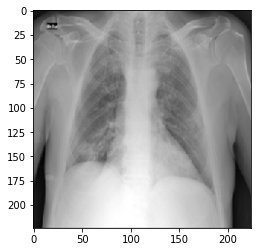

In [80]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

**Arquitectura del modelo, de red neuronal convolucional**


In [81]:
from tensorflow.keras import layers
from tensorflow.keras import models

#layers.Conv2D -> Capa convolucional
#layers.MaxPooling2D -> Capa max pooling
model = models.Sequential()
model.add(layers.Conv2D(320,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))#primera capa de redes convolucionales
model.add(layers.Conv2D(228,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25)) #Regularizar el rendimiento de su CNN o mejora el desempeño de su CNN

model.add(layers.Conv2D(128,(3,3),activation='relu'))#segunda
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128,(3,3),activation='relu'))#tercera
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(364,activation='relu'))#primera capa de redes neuronales densamente conectadas
model.add(layers.Dropout(0.5))

model.add(layers.Dense(264,activation='relu'))#segunda
model.add(layers.Dropout(0.5))

model.add(layers.Dense(164,activation='relu'))#tercera
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1,activation='sigmoid'))#capa de salida que da resultado si o

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 320)     8960      
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 228)     656868    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 110, 110, 228)    0         
 2D)                                                             
                                                                 
 dropout_18 (Dropout)        (None, 110, 110, 228)     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 128)     262784    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 128)      0         
 g2D)                                                 

Compilamos

In [82]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer='adam', #SGD
              metrics=['acc'])

**Definicion de los generadores pre-procesamiento** 

Permite normalizar los valores de las imagenenes del dataset, transformando los pixeles que van de 0 a 255, y nos quedara un valor de 0 y 1 

In [83]:
#Using ImageDataGenerator to read images from directories/leer imagenes de directorio
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Conjunto de entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255,  #Normalización
                                   shear_range = 0.2,
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)
#Conjunto de validación
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # Target directory
        target_size=(224, 224), # All images are resized from 240x320 to 72x96
        batch_size= 32, 
        color_mode='rgb',
        class_mode='binary',
        shuffle=True)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=1,
        color_mode='rgb',
        class_mode='binary',
        shuffle=False)

Found 1200 images belonging to 2 classes.
Found 670 images belonging to 2 classes.


**Entrenamiento**

In [84]:
#Training and validation stages
history = model.fit(
      train_generator,
      steps_per_epoch=7, #70
      epochs= 15,
      validation_data=validation_generator,
      validation_steps=60)

Epoch 1/15
7/7 [==============================] - 11s 1s/step - loss: 1.5581 - acc: 0.4866 - val_loss: 0.7009 - val_acc: 0.0000e+00
Epoch 2/15
7/7 [==============================] - 10s 1s/step - loss: 0.6942 - acc: 0.4777 - val_loss: 0.7004 - val_acc: 0.0000e+00
Epoch 3/15
7/7 [==============================] - 10s 1s/step - loss: 0.6901 - acc: 0.5536 - val_loss: 0.6895 - val_acc: 0.8333
Epoch 4/15
7/7 [==============================] - 10s 1s/step - loss: 0.6832 - acc: 0.5848 - val_loss: 0.7205 - val_acc: 0.0000e+00
Epoch 5/15
7/7 [==============================] - 10s 1s/step - loss: 0.6938 - acc: 0.5402 - val_loss: 0.7098 - val_acc: 0.0000e+00
Epoch 6/15
7/7 [==============================] - 10s 1s/step - loss: 0.6753 - acc: 0.5938 - val_loss: 0.5510 - val_acc: 1.0000
Epoch 7/15
7/7 [==============================] - 10s 1s/step - loss: 0.6357 - acc: 0.6473 - val_loss: 0.4056 - val_acc: 1.0000
Epoch 8/15
7/7 [==============================] - 18s 3s/step - loss: 0.4983 - acc: 0.77

**Grafica de la precisión y perdida durante el entrenamiento**

Best accuracy epoch :  6, Value :  1.00000
Best loss epoch :  14, Value :  0.1611050963


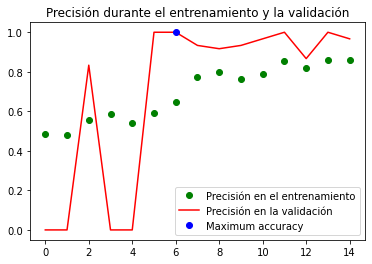

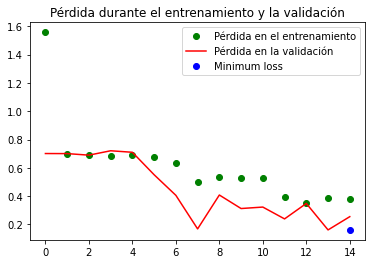

In [85]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
max_val_acc = max(val_acc)
max_val_acc_epoch= val_acc.index(max(val_acc)) + 1
loss = history.history['loss']
val_loss = history.history['val_loss']
min_val_loss = min(val_loss)
min_val_loss_epoch= val_loss.index(min(val_loss)) + 1

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Precisión en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.plot(max_val_acc_epoch, max_val_acc, 'bo', label='Maximum accuracy')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()
print("Best accuracy epoch : % d, Value : % .5f" %(max_val_acc_epoch, max_val_acc)) 
plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.plot(min_val_loss_epoch, min_val_loss, 'bo', label='Minimum loss')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()
print("Best loss epoch : % d, Value : % .10f" %(min_val_loss_epoch, min_val_loss))

plt.show()

**Guardamos el modelo**

In [86]:
model.save('/content/drive/MyDrive/modelos/modelo_Covid1.h5')

**Cargamos el modelo**

In [87]:
import tensorflow
modelp = tensorflow.keras.models.load_model('/content/drive/MyDrive/modelos/modelo_Covid1.h5', compile=False)

**Matriz de confución**

In [92]:
from sklearn.metrics import confusion_matrix

test_predictions = model.predict_generator(validation_generator, 679) # model.predict_generator(generador, num_lotes_por_epoca)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
#Establecemos que aquellas predicciones con valores mayores a 0.5, sean categorizadas como Positivas (True),
#y que las predicciones con valores menores a 0.5, sean clasificadas como Negativas (False)
test_predictions = (test_predictions > 0.5)
print(test_predictions)

[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 

In [94]:
#Etiquetas o valores esperados
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [95]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(validation_generator.classes, test_predictions)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[303  27]
 [  0 340]]


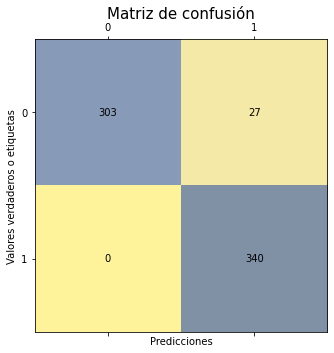

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.cividis_r, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

plt.title("Matriz de confusión", fontsize=15)
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos o etiquetas')

plt.tight_layout()
plt.show()

**Calculamos la metrica**

In [97]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.7f' % precision_score(y_true=validation_generator.classes, y_pred=test_predictions))
print('Recall: %.7f' % recall_score(y_true=validation_generator.classes, y_pred=test_predictions))
print('F1: %.7f' % f1_score(y_true=validation_generator.classes, y_pred=test_predictions))

Precision: 0.9264305
Recall: 1.0000000
F1: 0.9618105


**Se ve cuantas imagenes estan en validacion y la clasificacion que en este modelo solo se optienen dos que es con covid y sin covid** 

In [105]:
#Test stage
test_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(72, 96),
        batch_size=1,
        color_mode='rgb',
        class_mode='categorical')

Found 670 images belonging to 2 classes.


**cargamos la imagen y la damos tratamiento para que entre como el modelo espera de 224*224**

In [106]:
#Ruta de alguna imagen que pertenezca al conjunto de validación
img_path = './dataset/validate/covid/COVID-301.png'
# img_path = './dataset/validate/normal/Normal-301.png'
# Preprocesamos la imagen en un tensor 4D
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Recuerda que el modelo fue entrenado con imágenes
#de entrada que se preprocesaron de la siguiente manera:
img_tensor /= 255.

# Su dimensión es de (1, 224, 224, 3)
print(img_tensor.shape)

(1, 224, 224, 3)


**Cargamos la imagen al modelo, con dimenciones de 224 * 224**

In [107]:
predic = model.predict_generator(img_tensor) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


**Se ve cuanto es el valor ya pasado por el modelo**

In [108]:
predic

array([[0.24852413]], dtype=float32)

**Se espesifica que arriba del 0.5 de el resultado True y abajo del 0.5 de false**

* True=  Sano
* false= Tiene covid 

[[False]]
Tiene covid, necesita atención médica lo mas pronto posible, por favor


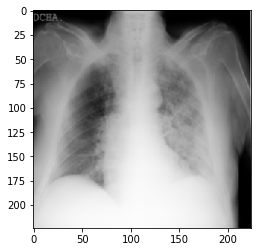

In [109]:
predic = (predic > 0.5)
print(predic)

if predic == False:
  print('Tiene covid, necesita atención médica lo mas pronto posible, por favor')
  plt.imshow(img_tensor[0])
  plt.show()
else:
  print('Esta sano, no presenta ningun indicio de covid')
  plt.imshow(img_tensor[0])
  plt.show()